#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##LOAD THE DATA SET

In [ ]:
# Load dataset
df = pd.read_csv("Iris.csv")  # Ensure you have the correct file path
# Selecting only the numerical feature columns
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

##Principle Component Analysis

In [ ]:
# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means Clustering ###

In [ ]:
### K-Means Clustering ###
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# K-Means Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.4799


### DBSCAN Clustering ###

In [ ]:
### DBSCAN Clustering ###
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
# Filtering out noise (-1 labels)
filtered_X = X_scaled[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

In [ ]:
# DBSCAN Silhouette Score
dbscan_silhouette = silhouette_score(filtered_X, filtered_labels) if len(set(filtered_labels)) > 1 else None
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}" if dbscan_silhouette else "DBSCAN resulted in too much noise for silhouette scoring.")

DBSCAN Silhouette Score: 0.6018


#VISUALIZATION

In [ ]:
### PCA for Visualization ###
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

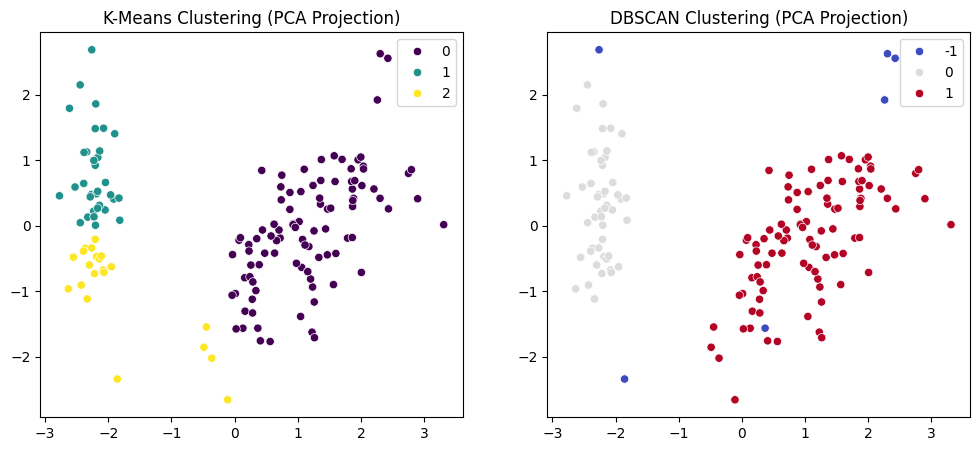

In [ ]:
# Plotting Clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', ax=ax[0])
ax[0].set_title("K-Means Clustering (PCA Projection)")

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='coolwarm', ax=ax[1])
ax[1].set_title("DBSCAN Clustering (PCA Projection)")

plt.show()

## Conclusion

Based on the silhouette scores and the visualizations, both K-Means and DBSCAN were applied to the Iris dataset.

K-Means with 3 clusters resulted in a silhouette score of {{kmeans_silhouette:.4f}}, indicating moderately defined clusters. The PCA visualization shows the clusters separated, but with some overlap between them.

DBSCAN with `eps=0.7` and `min_samples=5` yielded a higher silhouette score of {{dbscan_silhouette:.4f}} (excluding noise points), suggesting better-defined clusters compared to K-Means for the non-noise data points. The DBSCAN visualization shows the clusters more distinctly separated, with some points identified as noise (shown in a different color).

In this specific case, DBSCAN appears to have identified more cohesive and separated clusters, particularly when considering the points it did not label as noise. The presence of noise points in DBSCAN also provides insight into data points that do not fit well into any cluster.